In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


### comparing the new summary statistics for the fiducial model

In [17]:
fixed = [False, True, True, False, False, False]

data_OG = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/chain.h5", fixed, Nburn=100, Ncut=1500, Nthin=10)

data_r = jsm_mcmc.Chain("../../../data/corr_R/alpha/mock_1/chain.h5", fixed, Nburn=100, Ncut=1500, Nthin=10)

data_loop3 = jsm_mcmc.Chain("../../../data/new_stats/for_loop/3x/mock_1/chain.h5", fixed, Nburn=100, Nthin=10)

data_loop1 = jsm_mcmc.Chain("../../../data/new_stats/for_loop/1x/mock_1/chain.h5", fixed, Nburn=100, Nthin=10)

data_max = jsm_mcmc.Chain("../../../data/new_stats/max/mock_1/chain.h5", fixed, Nburn=100, Nthin=10)

data_tot = jsm_mcmc.Chain("../../../data/new_stats/tot/mock_1/chain.h5", fixed, Nburn=100, Nthin=10)

In [18]:
data = [data_loop1.clean, data_loop3.clean]

chain_labels = ["max 1x" + "\n $\\alpha = $" + data_loop1.constraints[0] + "\n $\\sigma = $" + data_loop1.constraints[1],
                "max 3x" + "\n $\\alpha = $" + data_loop3.constraints[0] + "\n $\\sigma = $" + data_loop3.constraints[1]]

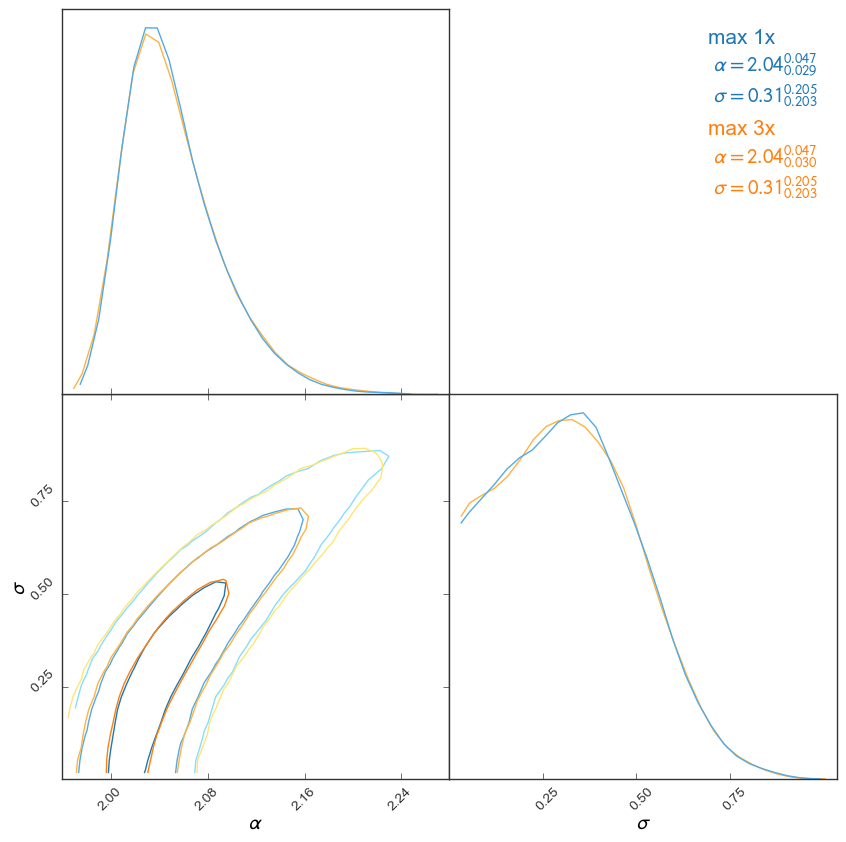

In [19]:
test = jsm_mcmc.MulitChain(data, chain_labels, np.array([10.5, 2.0, 0.2, 0, 0, 0]), fixed)
test.plot_posteriors(filledPlots=False)

In [20]:
data = [data_tot.clean, data_max.clean, data_OG.clean]

chain_labels = ["max + tot" + "\n $\\alpha = $" + data_tot.constraints[0] + "\n $\\sigma = $" + data_tot.constraints[1],
                "max" + "\n $\\alpha = $" + data_max.constraints[0] + "\n $\\sigma = $" + data_max.constraints[1],
                "original" + "\n $\\alpha = $" + data_OG.constraints[0] + "\n $\\sigma = $" + data_OG.constraints[1]]

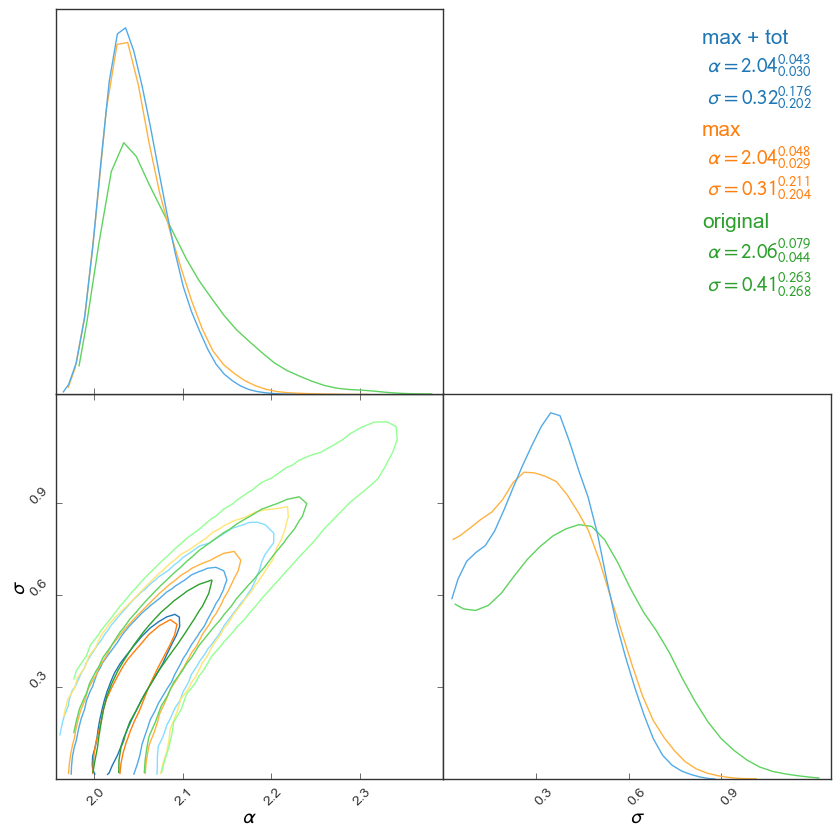

In [21]:
test = jsm_mcmc.MulitChain(data, chain_labels, np.array([10.5, 2.0, 0.2, 0, 0, 0]), fixed)
test.plot_posteriors(filledPlots=False)

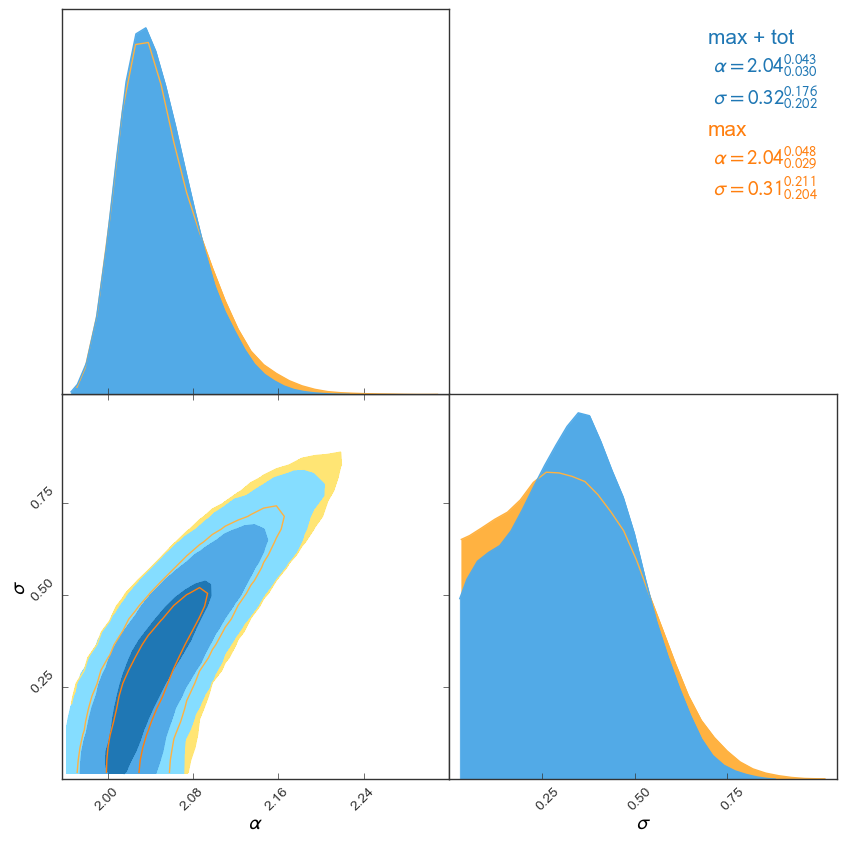

In [22]:
test = jsm_mcmc.MulitChain(data[0:2], chain_labels[0:2], np.array([10.5, 2.0, 0.2, 0, 0, 0]), fixed)
test.plot_posteriors()

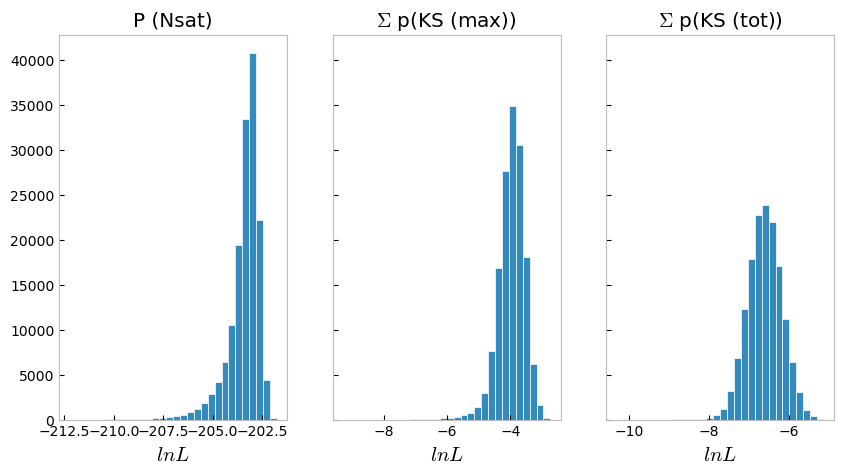

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(10,5), sharey=True)
axs[0].set_title("P (Nsat)")
axs[0].hist(data_tot.blobs["lnL_N"][~np.isinf(data_tot.blobs["lnL_N"])], bins=30, edgecolor="white")

axs[1].set_title("$\Sigma$ p(KS (max))")
axs[1].hist(data_tot.blobs["lnL_Msmax"][~np.isinf(data_tot.blobs["lnL_Msmax"])], bins=30, edgecolor="white")

axs[2].set_title("$\Sigma$ p(KS (tot))")
axs[2].hist(data_tot.blobs["lnL_Mstot"][~np.isinf(data_tot.blobs["lnL_Mstot"])], bins=30, edgecolor="white")

axs[0].set_xlabel("$lnL$")
axs[1].set_xlabel("$lnL$")
axs[2].set_xlabel("$lnL$")

plt.show()

### something is wrong with the really shallow values of slope!

In [24]:
data_2 = jsm_mcmc.Chain("../../../data/new_stats/mock_2_issues/tot_gauss2/chain.h5", fixed, Nburn=200, Ncut=1500, Nthin=15)

data_OG = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_2/chain.h5", fixed, Nburn=200, Ncut=1500, Nthin=15)

data_r = jsm_mcmc.Chain("../../../data/corr_R/alpha/mock_2/chain.h5", fixed, Nburn=200, Nthin=15)

In [25]:
data = [data_OG.clean, data_r.clean]

chain_labels = [f"original" + "\n $\\alpha = $" + data_OG.constraints[0] + "\n $\\sigma = $" + data_OG.constraints[1],
                "pearson R" + "\n $\\alpha = $" + data_r.constraints[0] + "\n $\\sigma = $" + data_r.constraints[1]]

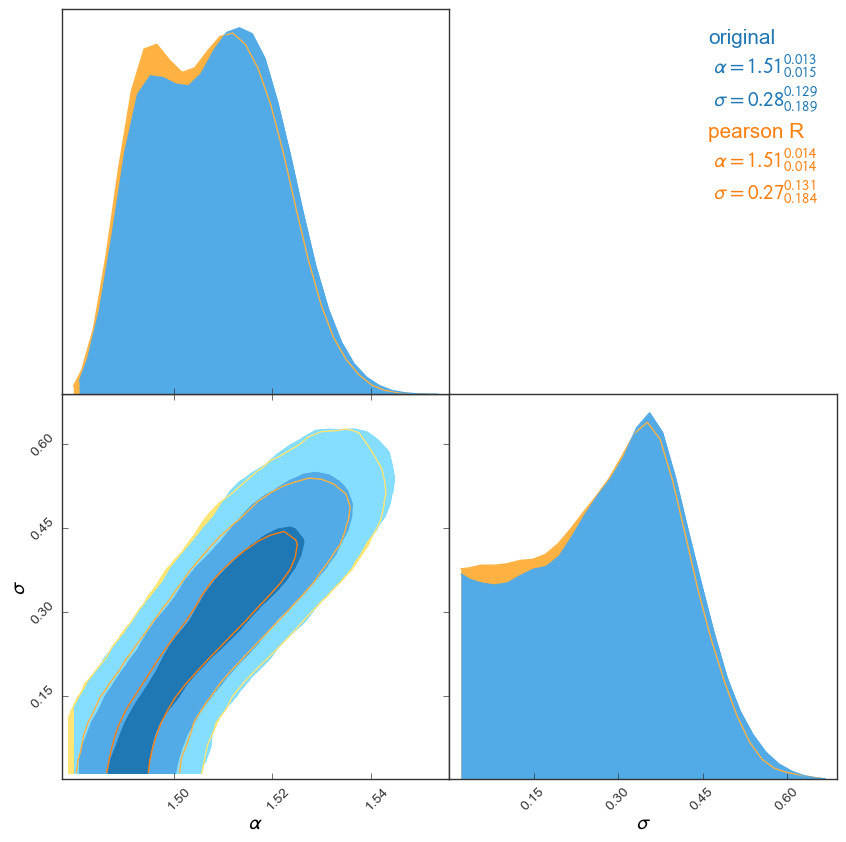

In [26]:
test = jsm_mcmc.MulitChain(data, chain_labels, np.array([10.5, 1.5, 0.2, 0, 0, 0]), fixed)
test.plot_posteriors()

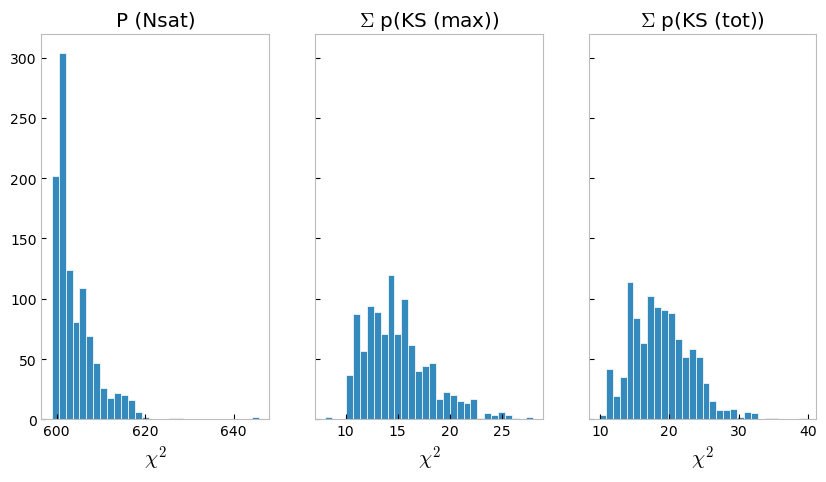

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10,5), sharey=True)
axs[0].set_title("P (Nsat)")
axs[0].hist(-2*data_2.blobs["lnL_N"][~np.isinf(data_2.blobs["lnL_N"])], bins=30, edgecolor="white")

axs[1].set_title("$\Sigma$ p(KS (max))")
axs[1].hist(-2*data_2.blobs["lnL_Msmax"][~np.isinf(data_2.blobs["lnL_Msmax"])], bins=30, edgecolor="white")

axs[2].set_title("$\Sigma$ p(KS (tot))")
axs[2].hist(-2*data_2.blobs["lnL_Mstot"][~np.isinf(data_2.blobs["lnL_Mstot"])], bins=30, edgecolor="white")

axs[0].set_xlabel("$\chi^2$")
axs[1].set_xlabel("$\chi^2$")
axs[2].set_xlabel("$\chi^2$")

plt.show()

### now for mock_3

In [13]:
data_max = jsm_mcmc.Chain("../../../data/new_stats/max/mock_5/chain.h5", fixed, Nburn=100, Nthin=15)

data_tot = jsm_mcmc.Chain("../../../data/new_stats/tot/mock_5/chain.h5", fixed, Nburn=100, Nthin=15)

data_OG = jsm_mcmc.Chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_5/chain.h5", fixed, Nburn=100, Ncut=1500, Nthin=15)

data_r = jsm_mcmc.Chain("../../../data/corr_R/alpha/mock_5/chain.h5", fixed, Nburn=100, Ncut=1500, Nthin=15)

In [14]:
data = [data_tot.clean, data_max.clean, data_OG.clean]

chain_labels = ["max + tot" + "\n $\\alpha = $" + data_tot.constraints[0] + "\n $\\sigma = $" + data_tot.constraints[1],
                "max" + "\n $\\alpha = $" + data_max.constraints[0] + "\n $\\sigma = $" + data_max.constraints[1],
                "original" + "\n $\\alpha = $" + data_OG.constraints[0] + "\n $\\sigma = $" + data_OG.constraints[1]]

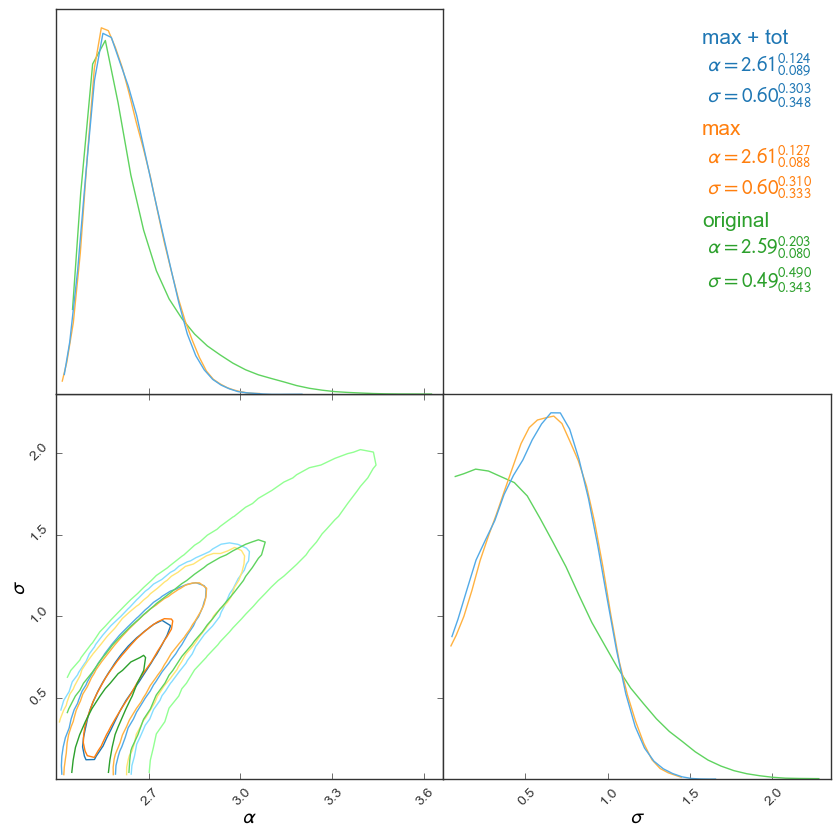

In [15]:
test = jsm_mcmc.MulitChain(data, chain_labels, np.array([10.5, 2.0, 0.2, 0, 0, 0]), fixed)
test.plot_posteriors(filledPlots=False)

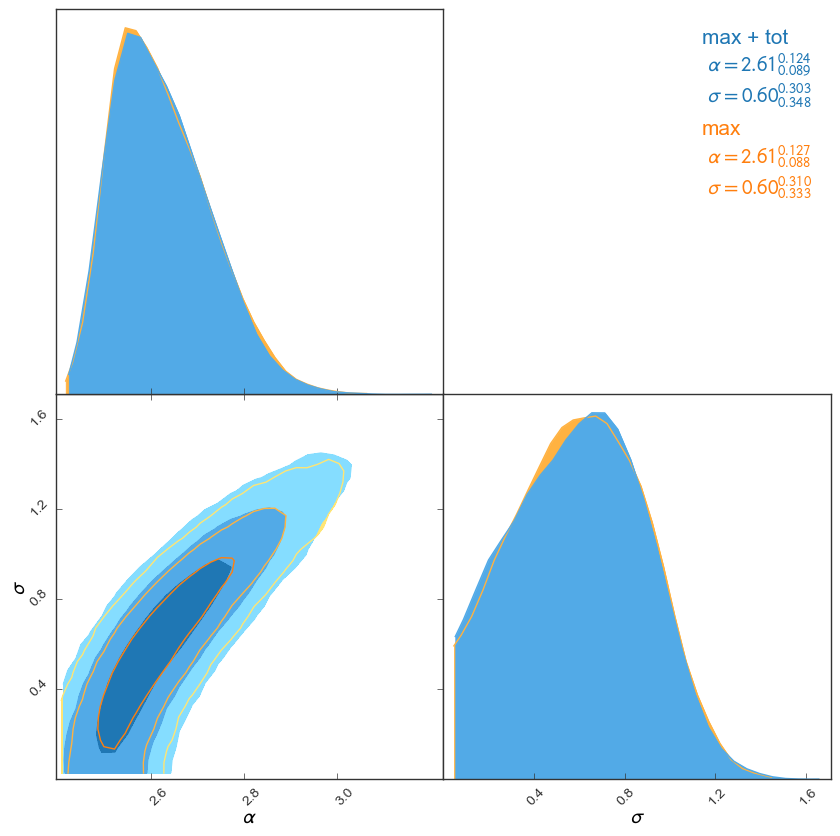

In [16]:
test = jsm_mcmc.MulitChain(data[0:2], chain_labels[0:2], np.array([10.5, 2.0, 0.2, 0, 0, 0]), fixed)
test.plot_posteriors()